# **HunterCS Topics: Clustering Code-Along**

In this Colab, you will learn how to use some basic commands with numpy and matplotlib packages.  Then, you will use those functions to write an algorithm to cluster & visualize data using the k-means clustering algorithm for a 1-dimensional set of data.

# (1) Generating Random Data with numpy
When trying to write an algorithm, we want to make sure we know what the outcome will be. We'll generate data that has obvious clusters so that we can check that our clustering algorithm works properly.

The `numpy` library has a `random` package similar to the `random` library we have used before. It is especially good for creating arrays of random values based on particular data distributions.

**numpy** Functions that Generate Random Numbers:
* [np.random.randint](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html#numpy.random.randint) - generates a random int across a range
* [np.random.uniform](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) - generates a random float across a range
* [np.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy.random.normal) - generates a random float across a normal distribution
* [np.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html#numpy-random-choice) - chooses a random number from an array

And many more!


In [ ]:
# Import numpy
# np is a common nickname to save typing time
import numpy as np

In [ ]:
# Generate 1 random int from 0 to 100
# Like most programming syntax, this excludes 100
np.random.randint(100)

70

In [ ]:
# Generate an array of 10 random ints from 0 to 100
# The line 'r1' acts as an implied print command, like you might use
# in an interactive terminal. A block in an ipynb will display the last
# such implied command it encounters, so if you want multiple items to print,
# use an explicit print statement.
r1 = np.random.randint(100, size = 10)
r1

array([ 5, 22, 20, 42,  5, 86, 91, 82, 59, 60])

In [ ]:
# Generate an array of 25 random floats from a uniform distribution
# A uniform distribution means that all outcomes between the low and high values
# are equally likely. For example, the outcome of rolling a die has a uniform
# distribution, because you're equally likely to get a 1, 2, 3, 4, 5, and 6.
u1 = np.random.uniform(0,100,size=25)
u1

array([13.17023553, 92.83834778, 48.28468154, 41.68319845, 58.43329204,
       43.08910784, 85.33229645, 71.37989365, 53.07070781, 55.64300994,
        5.43230187, 16.74473279, 18.81131246, 74.09808723, 52.21521959,
        3.36340629, 57.82959578, 28.59775669, 45.96434942, 59.09160369,
        4.20857941, 28.86774556, 24.56436513, 91.38614472, 50.60665906])

In [ ]:
# Generate an array of random floats from a normal dist
# Normal distributions are a bell curve. We can specify
# the "loc", or center, and the "scale," or standard deviation.

# located with a center at 4, scale of 1.5 and size of 25
n1 = np.random.normal(loc=4, scale=1.5, size=25)
n1

array([0.70737729, 4.16198507, 4.90656583, 4.0419866 , 6.12494285,
       2.42864343, 3.55971989, 3.16539891, 2.13989301, 5.5256474 ,
       4.20535463, 3.07877212, 7.4439184 , 3.63729929, 4.66869311,
       6.09371986, 3.41943906, 3.69259313, 3.09485136, 3.68399927,
       4.19194451, 1.45305627, 6.4374674 , 6.76856386, 6.15137059])

# (2) Plotting Data with matplotlib

**Matplotlib** is a very versatile plotting library for python (based on MATLAB). You've already used it in the ray tracing lesson to build the image you rendered. Here we will use it for data visualization, so that we can see the clustering in the data. We will be using the pyplot package in the matplotlib library.

Useful **matplotlib.pyplot** functions:
* [plt.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) - plots a histogram
* [plt.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter) - plots a scatterplot
* [plt.show](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html) - used to show a plot after using multiple plot commands

In [ ]:
#import matplotlib
# plt is a common nickname for matplotlib.pyplot to save typing time
import matplotlib.pyplot as plt

(array([1., 1., 2., 3., 6., 4., 1., 2., 4., 1.]),
 array([0.70737729, 1.3810314 , 2.05468551, 2.72833963, 3.40199374,
        4.07564785, 4.74930196, 5.42295607, 6.09661018, 6.77026429,
        7.4439184 ]),
 <BarContainer object of 10 artists>)

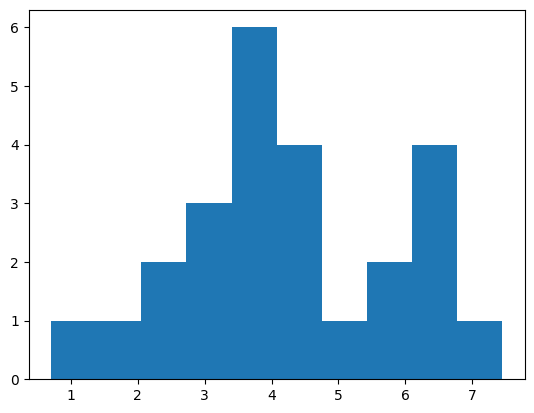

In [ ]:
#Create a graph that shows frequency of points (aka histogram)
plt.hist(n1)

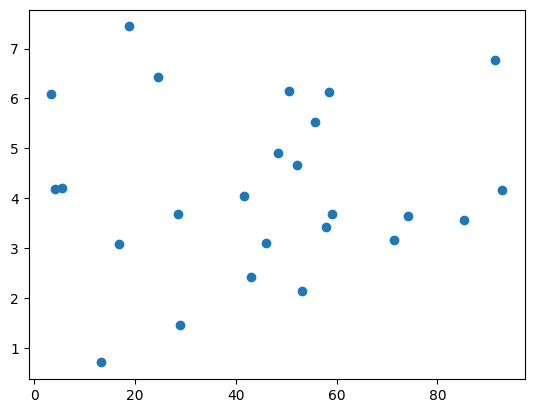

In [ ]:
# Create a scatter plot 
# First: using two of our previous data sets
# Then: since our data is 1D, make ydata an array of zeros
# np.zeros(n) makes a numpy array of length n containing
# the float value 0.

#V1: 
xdata = u1 # our uniform data
# ydata = n1 # our normal data
# plt.scatter(xdata, ydata)

#V2:
# make an array of zeros same length as xdata.
ydata = np.zeros(len(xdata)) # Notice the spelling - no zeroes!

# (3) Getting Data
Most data science is done by importing data from a .csv (Comma Separated Value) file. Because our focus today is clustering, we will provide some simpler options:
1. Generate random data to meet our desired criteria
2. Provide data as a numpy array variable from a list
3. Import data from a .csv file

## Option 3A: Getting Data from Random Numbers

In order to make sure our algorithm works, we need to use data that will cluster predictably. We already generated `n1`, which includes 25 random floating-point numbers centered at 5; we'll create more arrays at other values the same way to make sure that we will have distinct clusters. Then we'll combine the arrays into a single dataset.

Useful **numpy** functions:

* [np.concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html#numpy-concatenate) - combines multiple arrays into single array


In [ ]:
# Generate a second set of random numbers with a center at 10, scale of 1.5 and size of 25
n2 = np.random.normal(loc=10, scale=1.5, size=25)
n2

array([ 9.26363359,  7.52641009, 10.59751873,  9.07533427, 10.46279665,
       12.41965594, 10.15125121,  4.51474781, 10.69185381, 11.05779155,
       14.5785566 , 10.97253827, 10.20141795, 10.44796892,  9.20654327,
        7.47219082, 15.25533901, 10.57349733,  9.96158041,  9.0254484 ,
        8.0946291 , 11.03716262,  7.80200783, 10.14370223, 13.17002877])

In [ ]:
# Generate a third set of random numbers with a center at 16, scale of 1.5 and size of 25
n3 = np.random.normal(loc=16, scale=1.5, size=25)
n3

array([16.42136706, 16.69648885, 17.68397824, 17.02656002, 17.83814056,
       14.30386566, 14.42953024, 14.35585739, 14.98704217, 17.08459942,
       16.39493065, 17.37018347, 17.01095109, 16.63417351, 17.79232519,
       13.95868919, 15.73529075, 14.21064583, 15.50878644, 15.76190258,
       15.96194769, 16.15241997, 15.59888403, 13.65249631, 18.65396764])

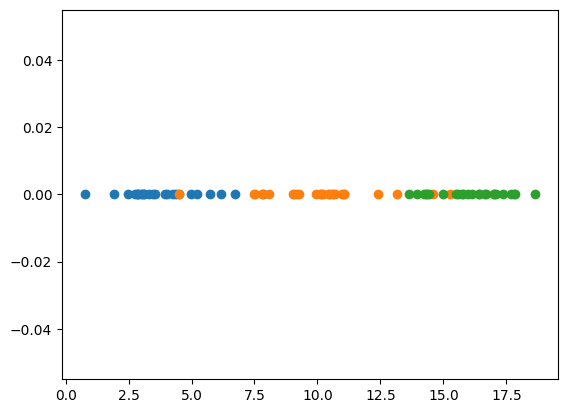

In [ ]:
# Plot all 3 sets of random numbers
# Note: Use the array of zeros we generated previously, ydata, for the y-axis plotting
plt.scatter(n1, ydata)
plt.scatter(n2, ydata)
plt.scatter(n3, ydata)

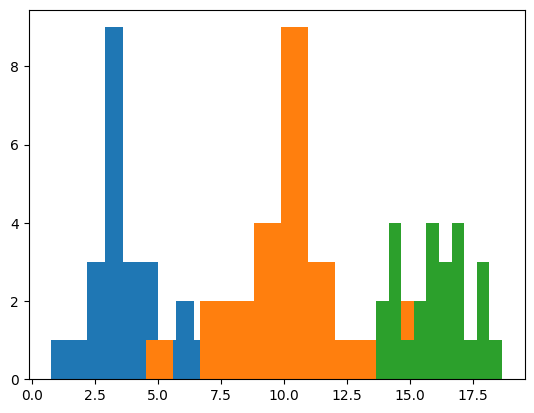

In [ ]:
# [OPTIONAL] Create a histogram to plot the 3 sets of numbers
# Use the bins parameter to determine how "skinny" the bars should be
plt.hist(n1, bins=10)
plt.hist(n2, bins=10)
plt.hist(n3, bins=10)
plt.show()

In [ ]:
# Concatenate the 3 sets of random numbers into 1 larger data array
# Note: the concatenate() function takes in an array of arrays, indicated by []
data = np.concatenate([n1, n2, n3])
data

array([ 3.0275082 ,  2.75683723,  4.0358836 ,  4.28301262,  6.74251017,
        4.96014815,  3.11705029,  2.48192113,  3.54886012,  6.16824302,
        5.20741775,  3.12656607,  2.85392586,  4.38449075,  3.45293974,
        0.75117978,  1.92086234,  3.29807213,  7.84248613,  2.88257953,
        2.8877462 ,  4.49771959,  5.73546375,  2.98517885,  3.93680119,
        9.26363359,  7.52641009, 10.59751873,  9.07533427, 10.46279665,
       12.41965594, 10.15125121,  4.51474781, 10.69185381, 11.05779155,
       14.5785566 , 10.97253827, 10.20141795, 10.44796892,  9.20654327,
        7.47219082, 15.25533901, 10.57349733,  9.96158041,  9.0254484 ,
        8.0946291 , 11.03716262,  7.80200783, 10.14370223, 13.17002877,
       16.42136706, 16.69648885, 17.68397824, 17.02656002, 17.83814056,
       14.30386566, 14.42953024, 14.35585739, 14.98704217, 17.08459942,
       16.39493065, 17.37018347, 17.01095109, 16.63417351, 17.79232519,
       13.95868919, 15.73529075, 14.21064583, 15.50878644, 15.76

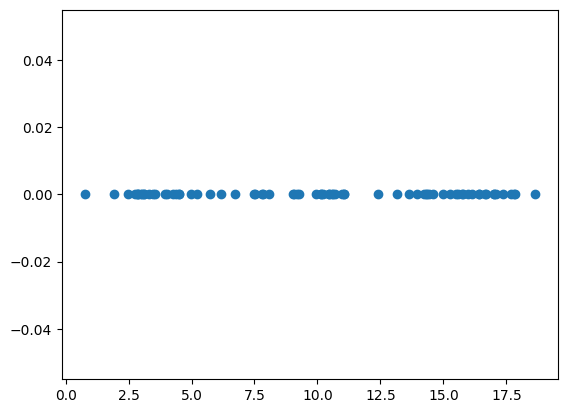

In [ ]:
# Create a scatterplot the new set of data
# Note: Update the ydata array of zeros to match the size of the bigger data array
ydata = np.zeros(75)
plt.scatter(data, ydata)

(array([1., 2., 9., 5., 5., 1., 2., 4., 1., 4., 8., 4., 0., 2., 2., 6., 6.,
        5., 5., 3.]),
 array([ 0.75117978,  1.64631918,  2.54145857,  3.43659796,  4.33173735,
         5.22687675,  6.12201614,  7.01715553,  7.91229493,  8.80743432,
         9.70257371, 10.5977131 , 11.4928525 , 12.38799189, 13.28313128,
        14.17827067, 15.07341007, 15.96854946, 16.86368885, 17.75882825,
        18.65396764]),
 <BarContainer object of 20 artists>)

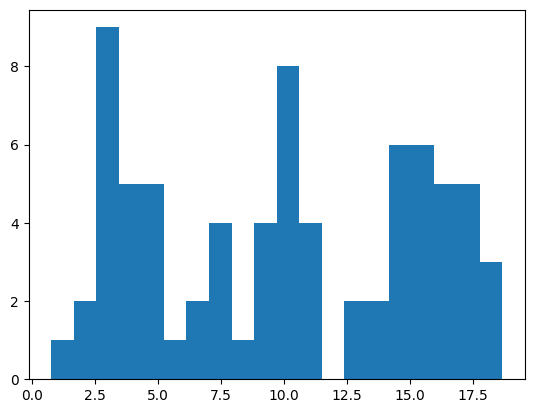

In [ ]:
# [OPTIONAL] Create a histogram to show the data
# Use the bins parameter to determine how "skinny" the bars should be
plt.hist(data, bins=20)


## Option 3B: Getting Data from a List
Our class completed a survey about:
* horror movie preferences
* favorite number
* preferred number of pets
* how much to pay for shoes
* height in inches

This data was copied into a **numpy** array that can be checked for clustering.

In [ ]:
# Access arrays of data from our class survey
heights=np.array([65,72,65,60.5,70,77,60,65,67,67,65,60,73.5,60.25,63,68,69,62.5,63,63,70,69,57,68,64,70,67,72,66,72,68,67,63])
shoes=np.array([180,65,150,200,200,150,200,400,100,200,500,200,350,300,500,80,250,80,200,240,175,350,200,150,150,60,200,200,100,300,75,140,200])
horror=np.array([2.1,1.1,2.5,2.6,1.2,2.2,1.2,5.8,7.1,5.1,7.2,1.6,4.7,3.3,1.1,4.7,5.0,5.2,4.3,3.3,2.8,4.1,7.8,1.1,1.8,1.6,5.4,3.2,1.0,7.8,5.6,7.0,2.9])
fave_nums=np.array([7,7,2,8,7,9,4,7,7,3,10,1,3,9,2,4,7,6,10,7,7,7,10,7,2,8,4,8,9,10,7,1,5])
pets=np.array([4,0,2,3,0,2,1,2,3,2,0,1,1,3,0,4,0,0,1,3,1,4,1,0,2,2,0,0,2,5,2,1,0])
heights

array([65.  , 72.  , 65.  , 60.5 , 70.  , 77.  , 60.  , 65.  , 67.  ,
       67.  , 65.  , 60.  , 73.5 , 60.25, 63.  , 68.  , 69.  , 62.5 ,
       63.  , 63.  , 70.  , 69.  , 57.  , 68.  , 64.  , 70.  , 67.  ,
       72.  , 66.  , 72.  , 68.  , 67.  , 63.  ])

In [ ]:
# Assign arrays to be used for clustering (as data)
# data = heights
# data = shoes
# data = horror
# data=fave_nums       #not good for clustering with 1D data
# data=pets            #not good for clustering with 1D data
data

array([344700., 176500., 270500., ...,  62000., 162500., 500001.])

In [ ]:
# Setup the ydata value
# Note: if 1D data, make an array of zeros the same length as the xdata
#ydata = heights
ydata = np.zeros(len(data))
ydata

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

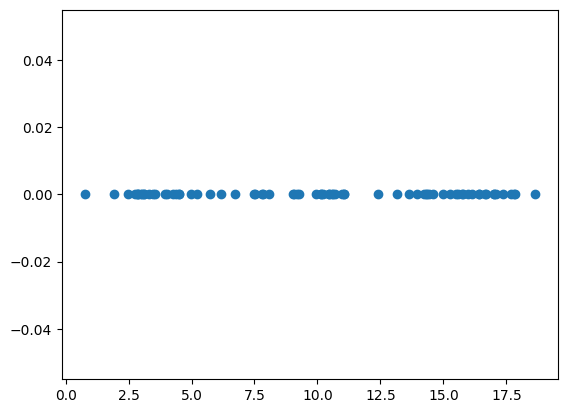

In [ ]:
# Plot the new set of data
plt.scatter(data, ydata)

## Option 3C: Getting Data from a .CSV file
**pandas** is a python module widely used for handling large data sets like those you might get from a .csv file.  A pandas "Dataframe" is the coding structure used to maniuplate the data.

Useful **pandas** functions:

* [pd.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) - import a csv file's data
* [pd.to_numpy](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html) - convert a pandas dataframe (or column)

Notes:
1. *Uncomment code segments to run*
2. *Make sure to import a .csv file into the project, by placing it in the 'content' folder of the Colab*
3. *You can find many real-world .csv datasets at [Kaggle.com](https://www.kaggle.com/datasets?fileType=csv)*

In [ ]:
# Import the pandas module
import pandas as pd

In [ ]:
# Import data from a csv file as a "dataframe"
# Note: Make sure you have a .csv file in your project folder (in Colab, check the "content" folder)
# df = pd.read_csv('sample_data/california_housing_test.csv')
df = pd.read_csv('sample_data/california_housing_test.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [ ]:
# Examine one particular column of the data frame 
#df.population
#df.total_rooms
#df.median_income
df.median_house_value

0         66900.0
1         80100.0
2         85700.0
3         73400.0
4         65500.0
           ...   
16995    111400.0
16996     79000.0
16997    103600.0
16998     85800.0
16999     94600.0
Name: median_house_value, Length: 17000, dtype: float64

In [ ]:
# Convert one of the columns from the dataframe to a numpy array
data = df.median_house_value.to_numpy()
data

array([344700., 176500., 270500., ...,  62000., 162500., 500001.])

In [ ]:
# Generate an array to use for the y-values (either zeros or actual data)
ydata = [0]*len(data)
#ydata = df.population.to_numpy()  #option for 2D clustering

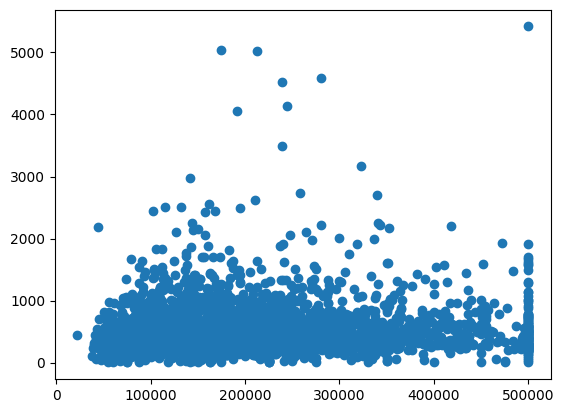

In [ ]:
# Plot the new set of data
# Note: With a very large data set, 1D data will likely look like a straight line
# but clusters may be much more visible with 2D data
plt.scatter(data, ydata)

# (4) Setting up the k-means Clustering Algorithm
Now that we have data to work with, we should begin setting up the structure for our k-means clustering algorithm.



Important design decisions include: 
* `k` - How many clusters do we want to sort the data into?
* `centroids` - What is the value at the center of all the data points of a particular cluster?  How will we decide on the initial centroid values of those clusters?
* `labels` - How will we determine which cluster each data point will be assigned to?

Useful numpy functions:
* [np.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html#numpy-random-choice) - chooses a random number from an array
* [np.random.uniform](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) - generates a random float across a range
* [np.min](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.min.html) - selects the minimum value from a numpy array
* [np.max](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.max.html) - selects the maximum value from a numpy array
* [np.zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html#numpy.zeros) - generates an array of zeros

In [ ]:
# Define the number of clusters (k) you expect in the data
k = 3

In [ ]:
# Choose 3 random points to be your starting values for the centroids
# Note: Make sure no 2 centroids are the same value
centroids = np.random.choice(data, size=k, replace=False)
#centroids = np.random.uniform(np.min(data), np.max(data), size=k)
centroids

array([310500., 350000., 225000.])

In [ ]:
# Create an array of zeros that will store the labels for which cluster each data point should belong to
# (ie. Cluster label 0, Cluster label 1, and Cluster label 2, etc)
# Note: We need these to be integers and not floats, so use the dtype=np.int8 parameter
labels = np.zeros((len(data)), dtype = np.int8)
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

# (5) Updating clusters (centroids & labels)
To continue the k-means clustering algorithm, we now need to assign every data point to one of our clusters, depending on which cluster's centroid is closest.

Useful numpy functions:
* [np.zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html#numpy.zeros) - generates an array of zeros
* [np.argmin](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html) - returns the index of the minimum value of an array
* [np.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html#numpy.mean) - finds the mean of an array

## Option 5A: Updating Clusters Once
Write segments of code that will create a first guess at the best way to cluster the data points.

In [ ]:
# For every data-point, calculate the distance to each of the k centroids
# Store the distances in an array (data's size-long) of arrays (k-long) 
distances = np.zeros((len(data), k))
for i in range(k):
  distances[:,i] = abs(data - centroids[i])
distances

array([[243600., 283100., 158100.],
       [230400., 269900., 144900.],
       [224800., 264300., 139300.],
       ...,
       [206900., 246400., 121400.],
       [224700., 264200., 139200.],
       [215900., 255400., 130400.]])

In [ ]:
# Assign each data-point to a cluster (whichever centroid is closest)
for i in range(len(distances)):
    labels[i] = (np.argmin(distances[i]))
labels

array([2, 2, 2, ..., 2, 2, 2], dtype=int8)

In [ ]:
# Update the centroid values to better match the assigned data-points
# Note: You can filter out a subset of the array with [labels == i]
for i in range(k):
    centroids[i] = np.mean(data[labels == i])
centroids

array([294899.33110368, 423699.1331058 , 152777.92943736])

In [ ]:
# Generate ycentroids
# Note: if 1D data, make an array of zeros the same length as the xcentroids
ycentroids = np.zeros(len(centroids))
ycentroids

array([0., 0., 0.])

## Option 5B: Updating Clusters in a Loop (n Times)
Write a code block that will repeat all of the code blocks from Section 5A a constant number of times, `n`.

In [ ]:
# Copy all of Updating Clusters code (5A) into a loop
# Setup the loop to exit after n times

n=100
for x in range(n):
  # For every data-point, calculate the distance to each of the k centroids
  # Store the distances in an array (xdata's size-long) of arrays (k-long) 
  distances = np.zeros((len(data), k))
  for i in range(k):
    distances[:,i] = abs(data - centroids[i])

  # Assign each data-point to a cluster (whichever centroid is closest)
  # Note: argmin() finds the index , not value
  for i in range(len(distances)):
      labels[i] = (np.argmin(distances[i]))

  # Update the centroid values to better match the assigned data-points
  # Note: You can filter out a subset of the array with [labels == i]
  for i in range(k):
      centroids[i] = np.mean(data[labels == i])

  # Generate ycentroids
  # Note: if 1D data, make an array of zeros the same length as the xcentroids
  ycentroids = np.zeros(len(centroids))

  #print out the centroids each iteration of the loop
  print(i,centroids)

[278562.9985229  449332.47064727 136781.45235267]
[269541.94002817 453093.67556253 130326.04703557]
[264314.54614508 450783.94390617 127724.1170572 ]
[260941.06414535 448073.88124691 126347.63651539]
[258328.44921733 445937.17448043 125274.45120271]
[256241.32901135 443838.03212093 124501.85380493]
[254393.74110953 442289.09150023 123729.44768513]
[251923.03860523 438655.07095047 123115.57189757]
[250084.58806818 436216.47002606 122597.48466799]
[247854.00313972 434606.4080239  121569.44150605]
[245910.49542551 432751.15600167 120785.84346642]
[244060.02737851 430895.86639344 120059.98118403]
[242584.61928934 429773.32550607 119361.98329466]
[241337.95069596 428768.04725671 118780.26885246]
[240347.45989305 427661.69924812 118409.14077041]
[239521.957716   426822.94666667 118075.16238304]
[238826.97674419 426025.04432348 117821.20551855]
[238317.84411277 425448.11205564 117632.92722501]
[237813.37190083 425017.62076923 117401.05341317]
[237536.63366337 424766.97890295 117277.81063243]


## Option 5C: Updating Clusters Until Convergence
Write a code block that will repeat all of the code blocks from Section 5A until the clusters converge stop changing or "converge".  Convergence can be checked for if either the labels array or the centroids are stop changing.



Additional features within your loop should:
* `# Store the labels/centroids from each previous iteration`
* `# Check if the old labels/centroids are equivalent to the new labels/centroids`

In [ ]:
# Copy all of Updating Clusters code (5A) into a loop
# Setup the loop to exit after convergence
# [OPTIONAL] Setup the loop to exit after convergence OR end early after n iterations



# (6) Plotting the Clusters
Use the matplotlib functions to display a graph showing the data points colored by cluster with clear markers indicating where the centroids are for each cluster.

Useful matplotlib functions:
* [plt.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter) - plots a scatterplot
  * `x` parameter to specify data on horizontal axis
  * `y` parameter to specify data on vertical axis
  * `s` paramter to specify size of the plot marker
  * `c` parameter to specify a list to color
  * `marker` parameter to choose a [shape/character](https://matplotlib.org/stable/api/markers_api.html) to mark points
  * `linewidths` parameter to specify how thick the marker should be
  * `color` parameter to specify one specific color
* [plt.xlabel](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html) - adds label to x-axis
* [plt.ylabel](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html) - adds label to y-axis
* [plt.title](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html) - adds title to plot
* [plt.show](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html) - used to show a plot after using multiple plot commands

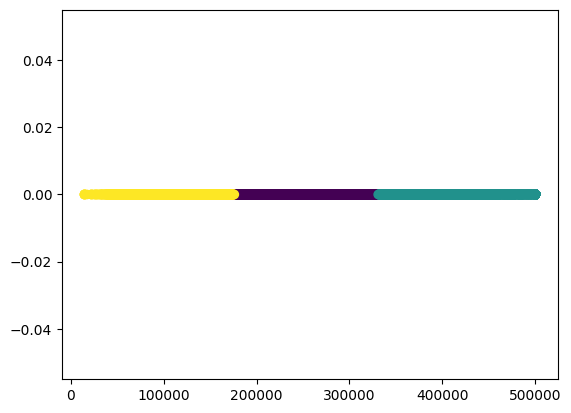

In [ ]:
# Create a scatterplot with all the datapoints
# Note: Use c=labels parameter to color the dots based on their cluster
plt.scatter(data, ydata, c = labels)

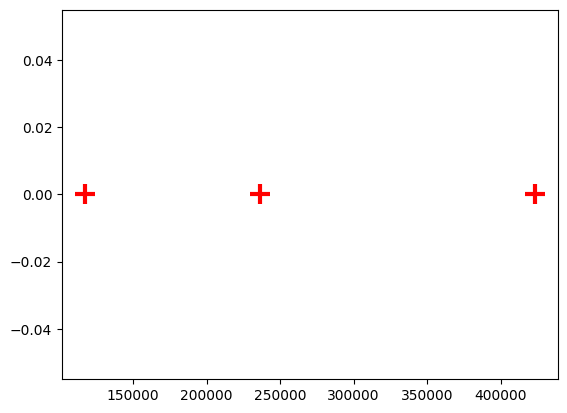

In [ ]:
# Create a scatterplot that adds the centroids with a red plus-sign (+) markers
# Note: Look in the documentation for the optional parameters to add
plt.scatter(centroids, ycentroids, marker = '+', s = 200, linewidths = 3, color = 'r')

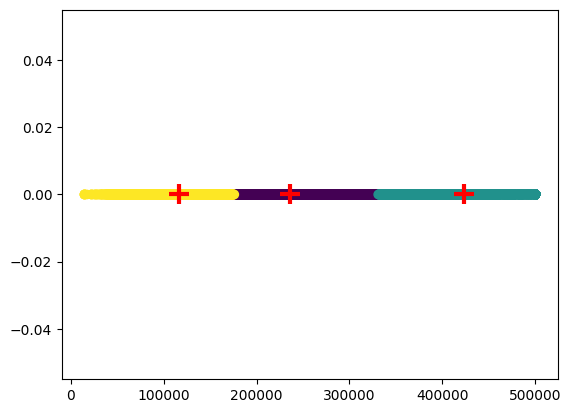

In [ ]:
# Plot both the datapoints AND red plus-sign(+)'s on the same plot
# Note: Copy the lines of code from the previous block 
plt.scatter(data, ydata, c = labels)
plt.scatter(centroids, ycentroids, marker = '+', s = 200, linewidths = 3, color = 'r')

#display the scatterplot
plt.show()